### Load Packages and Classes

In [4]:
import pandas as pd
import numpy as np
import math
import os, sys
lib_path = os.path.abspath(os.path.join('../..', 'src')) # relative path of the source code in Box Folder 
sys.path.append(lib_path)

from PI_client2 import *

# libraries to plot
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
style.use('fivethirtyeight')
#plt.style.use('dark_background')

pc = pi_client ()

import os, sys
sys.path
print os.path.abspath(os.path.join('../..', 'src'))

/Users/decolvin/Box Sync/UCD_ECO_coding/src


## Extract Data from the PI System (Central data infrastrucure)

In [5]:
points , _ = pc.search_by_point("*aitit**")
points

[u'aiTIT4045']

In [6]:
# If points are in csv:
#mycsv = pd.read_csv("/Users/decolvin/Downloads/02152018-GBSF-flatlines.csv")
#mycsv2 = mycsv["Name"]
#points = list(mycsv2.values.flatten())
#points

In [7]:
# inputs common to all the series
points_selected = ['chcpchw1afi201',
                  'chcpchw1ati202 ',
                  'chcpchw1ati201',
                  'teschw1aji7800',
                  'TI7000R_SCL',
                  'TI7000S_SCL',
                   'OUTSIDE_AIR_WETBULB_TEMP',
                   'OUTSIDE_AIR_HUMIDITY',
                  'aiTIT4045']

#points_selected = list(np.random.choice(points_selected[0:len(points_selected)],1000,replace=False))

start = "2015-01-01"
end = "*"
interval="1h"

print len(points_selected)

9


In [8]:
calculation = "calculated"
sumType="Average" 
#sumType = "PercentGood"

calculated = pc.get_stream_by_point(point_names = points_selected,
                            start=start,
                            end=end,
                            calculation=calculation,
                            interval=interval,
                            sumType=sumType,
                            label=None,
                            dataserver="s09KoOKByvc0-uxyvoTV1UfQVVRJTC1QSS1Q",
                            WebID_dic=None)
print calculated.shape

chcpchw1afi201                                    1 / 9    
chcpchw1ati202                                    2 / 9    
chcpchw1ati201                                    3 / 9    
teschw1aji7800                                    4 / 9    
TI7000R_SCL                                       5 / 9    
TI7000S_SCL                                       6 / 9    
OUTSIDE_AIR_WETBULB_TEMP                          7 / 9    
OUTSIDE_AIR_HUMIDITY                              8 / 9    
aiTIT4045                                         9 / 9    
(32698, 9)


In [9]:
calculated.tail()

,chcpchw1afi201,chcpchw1ati202,chcpchw1ati201,teschw1aji7800,TI7000R_SCL,TI7000S_SCL,OUTSIDE_AIR_WETBULB_TEMP,OUTSIDE_AIR_HUMIDITY,aiTIT4045
2018-09-24 09:00:00,0.000000,49.691560,40.475206,5282.026529,50.309262,39.173874,55.178420,27.452050,73.109741
2018-09-24 10:00:00,2587.056576,51.766259,41.348340,6013.341352,52.912666,39.112689,56.508810,20.974832,77.196529
2018-09-24 11:00:00,4915.603971,54.522329,41.087397,6309.769332,54.136356,39.147860,58.301487,18.948642,80.367248
2018-09-24 12:00:00,4640.858102,55.798036,41.516947,7309.380541,54.747684,39.361366,60.416778,18.781244,83.188735
2018-09-24 13:00:00,4243.137225,56.206454,40.937785,8490.020373,55.502406,39.774488,62.115558,18.023940,86.183628


### Plot Data

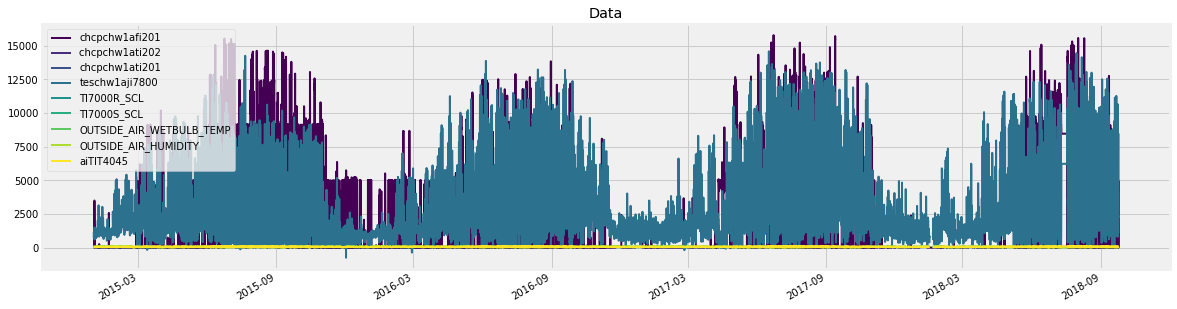

In [11]:
calculated.iloc[:,:].plot(figsize=(18,5), title="Data",
                          linewidth=2, colormap='viridis', legend=True)

### Data Preprocessing

In [12]:
calculated.columns

Index([u'chcpchw1afi201', u'chcpchw1ati202 ', u'chcpchw1ati201',
       u'teschw1aji7800', u'TI7000R_SCL', u'TI7000S_SCL',
       u'OUTSIDE_AIR_WETBULB_TEMP', u'OUTSIDE_AIR_HUMIDITY', u'aiTIT4045'],
      dtype='object')

In [13]:
q_chcp = calculated.iloc[:,0]*(calculated.iloc[:,1] - calculated.iloc[:,2])
dt_chcp = calculated.iloc[:,1] - calculated.iloc[:,2]
q_tes = calculated.teschw1aji7800
dt_tes = calculated.TI7000R_SCL - calculated.TI7000S_SCL
dt = (q_chcp*dt_chcp + q_tes*dt_tes)/(q_chcp+q_tes)

calculated2 = pd.concat([calculated, q_chcp, dt_chcp, q_tes, dt_tes, dt], axis=1)
calculated2.columns = list(calculated.columns) + ["q_chcp","dt_chcp","q_tes","dt_tes","dt"]
calculated2.tail()

,chcpchw1afi201,chcpchw1ati202,chcpchw1ati201,teschw1aji7800,TI7000R_SCL,TI7000S_SCL,OUTSIDE_AIR_WETBULB_TEMP,OUTSIDE_AIR_HUMIDITY,aiTIT4045,q_chcp,dt_chcp,q_tes,dt_tes,dt
2018-09-24 09:00:00,0.000000,49.691560,40.475206,5282.026529,50.309262,39.173874,55.178420,27.452050,73.109741,0.000000,9.216354,5282.026529,11.135389,11.135389
2018-09-24 10:00:00,2587.056576,51.766259,41.348340,6013.341352,52.912666,39.112689,56.508810,20.974832,77.196529,26951.745240,10.417919,6013.341352,13.799977,11.034858
2018-09-24 11:00:00,4915.603971,54.522329,41.087397,6309.769332,54.136356,39.147860,58.301487,18.948642,80.367248,66040.804996,13.434932,6309.769332,14.988496,13.570420
2018-09-24 12:00:00,4640.858102,55.798036,41.516947,7309.380541,54.747684,39.361366,60.416778,18.781244,83.188735,66276.508350,14.281089,7309.380541,15.386318,14.390873
2018-09-24 13:00:00,4243.137225,56.206454,40.937785,8490.020373,55.502406,39.774488,62.115558,18.023940,86.183628,64787.055800,15.268669,8490.020373,15.727918,15.321878


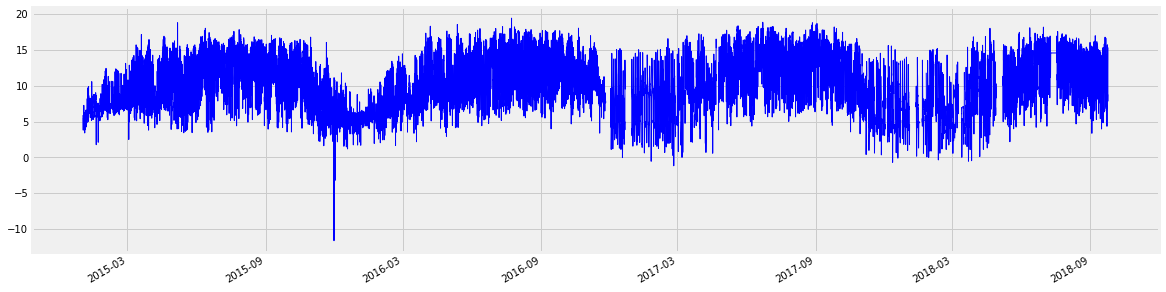

In [14]:
calculated2.dt.plot(figsize=(18,5), linewidth=1, colormap='winter')

In [15]:
calculated2['repump'] = 0
calculated2.loc["2016-11-28":"2017-03-10",'repump'] = 1
calculated2.loc["2017-11-06":"2018-04-19",'repump'] = 1 
calculated2.repump = calculated2.repump.astype("category")

calculated2['total tons'] = calculated2.q_chcp + calculated2.q_tes

In [16]:
delta = calculated2.loc[:,["aiTIT4045","OUTSIDE_AIR_WETBULB_TEMP","OUTSIDE_AIR_HUMIDITY","repump","total tons","dt"]]
delta.rename(columns={"aiTIT4045":"OAT","dt":"deltat"}, inplace=True)
delta.tail()

,OAT,OUTSIDE_AIR_WETBULB_TEMP,OUTSIDE_AIR_HUMIDITY,repump,total tons,deltat
2018-09-24 09:00:00,73.109741,55.178420,27.452050,0,5282.026529,11.135389
2018-09-24 10:00:00,77.196529,56.508810,20.974832,0,32965.086592,11.034858
2018-09-24 11:00:00,80.367248,58.301487,18.948642,0,72350.574328,13.570420
2018-09-24 12:00:00,83.188735,60.416778,18.781244,0,73585.888891,14.390873
2018-09-24 13:00:00,86.183628,62.115558,18.023940,0,73277.076174,15.321878


In [17]:
print delta.shape
print
print delta.dtypes
print
print "Number of missing values"
print delta.isnull().sum()

(32698, 6)

OAT                          float64
OUTSIDE_AIR_WETBULB_TEMP     float64
OUTSIDE_AIR_HUMIDITY         float64
repump                      category
total tons                   float64
deltat                       float64
dtype: object

Number of missing values
OAT                          133
OUTSIDE_AIR_WETBULB_TEMP     123
OUTSIDE_AIR_HUMIDITY         123
repump                         0
total tons                  1780
deltat                      1780
dtype: int64



In [18]:
### Remove rows where delta has missing values
l1 = delta.loc[delta.deltat.isnull(),:]
delta2 = delta.drop(l1.index)
delta2.shape

(30918, 6)

In [19]:
### Remove rows where OAT has missing values
l2 = delta2.loc[delta2.OAT.isnull(),:]
delta2 = delta2.drop(l2.index)
delta2.shape

(30911, 6)

In [20]:
print "Number of missing values"
print delta2.isnull().sum()

Number of missing values
OAT                         0
OUTSIDE_AIR_WETBULB_TEMP    0
OUTSIDE_AIR_HUMIDITY        0
repump                      0
total tons                  0
deltat                      0
dtype: int64


In [21]:
### Add variables 

delta2["cdd"] = delta2.OAT - 65.0
delta2.loc[delta2.cdd < 0, "cdd"] = 0
delta2["hdd"] = 65.0 - delta2.OAT
delta2.loc[delta2.hdd < 0, "hdd"] = 0

delta2["cdd2"] = delta2.cdd**2
delta2["hdd2"] = delta2.hdd**2

delta2["OAT2"] = delta2.OAT**2

delta2["Date"] = delta2.index.date
filt = ["delta", "cdd", "hdd"]

delta3 = delta2

delta3["MONTH"]= delta3.index.month
delta3["MONTH"] = delta3["MONTH"].astype('category')
delta3["TOD"] = delta3.index.hour
delta3["TOD"] = delta3["TOD"].astype('category')
delta3["DOW"]=delta3.index.weekday
delta3["DOW"] = delta3["DOW"].astype('category')

### Create dummy variables
l3 = ["MONTH","TOD","DOW","repump"]#,"WEEK"]#,"DOY"]
delta3 = pd.get_dummies(data=delta3, columns=l3, drop_first=True)

### Create Weekend flag
WEEKEND= [0] * len(delta3.DOW_5)
for i in range(0,len(delta3.DOW_5)):
    if ((delta3.DOW_5.iloc[i] == 1) | (delta3.DOW_6.iloc[i] == 1)): 
        WEEKEND[i] = 1 
else: 0

delta3["WEEKEND"] = pd.Series(WEEKEND).values

In [22]:
# Lag Variables
delta3['diff1'] = delta3.deltat.shift(1)
delta3['diff2'] = delta3.deltat.shift(2)

In [630]:
delta3.tail(1)

,OAT,OUTSIDE_AIR_WETBULB_TEMP,OUTSIDE_AIR_HUMIDITY,total tons,deltat,cdd,hdd,cdd2,hdd2,OAT2,...,DOW_4,DOW_5,DOW_6,repump_1,WEEKEND,diff1,diff2,OAT_shift1,OAT_shift2,rolling7
2018-09-24 13:00:00,86.183628,62.115558,18.02394,73277.076174,15.321878,21.183628,0.0,448.746093,0.0,7427.617725,...,0,0,0,0,0,14.390873,13.57042,83.188735,80.367248,14.427724


In [24]:
### Summary
print delta3.dtypes
print
print delta3.describe()

OAT                         float64
OUTSIDE_AIR_WETBULB_TEMP    float64
OUTSIDE_AIR_HUMIDITY        float64
total tons                  float64
deltat                      float64
cdd                         float64
hdd                         float64
cdd2                        float64
hdd2                        float64
OAT2                        float64
Date                         object
MONTH_2                       uint8
MONTH_3                       uint8
MONTH_4                       uint8
MONTH_5                       uint8
MONTH_6                       uint8
MONTH_7                       uint8
MONTH_8                       uint8
MONTH_9                       uint8
MONTH_10                      uint8
MONTH_11                      uint8
MONTH_12                      uint8
TOD_1                         uint8
TOD_2                         uint8
TOD_3                         uint8
TOD_4                         uint8
TOD_5                         uint8
TOD_6                       

### Data exploration for outliers

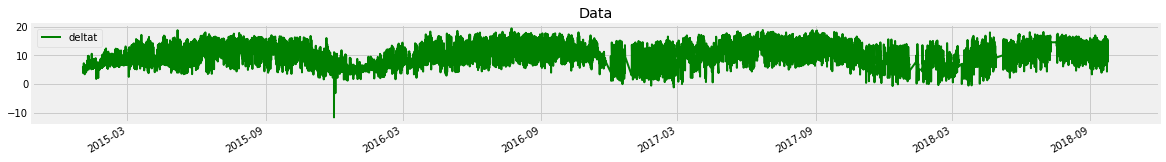

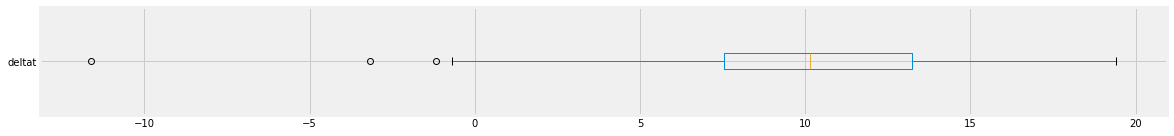

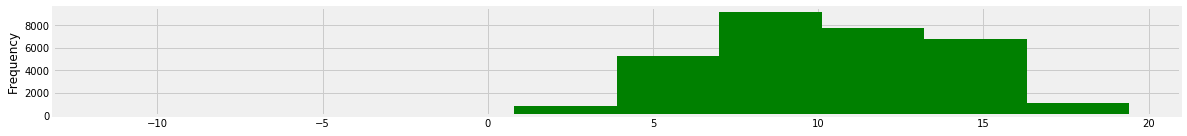

In [25]:
# Plot DeltaT data
plt.figure()
delta3["deltat"].plot(figsize=(18,2), title="Data",
                          linewidth=2, color='green' ,legend=True)
plt.figure()
delta3.deltat.plot(kind='box',figsize=(18,2),vert=False)

plt.figure()
delta3.deltat.plot(kind='hist',figsize=(18,2), color='green')

In [26]:
### Remove values less than 0
print delta3.deltat.quantile([0.01,0.05,0.95,0.99])
delta3.loc[delta3.deltat<0,"deltat"] = 0
#delta3.delta.describe()

0.01     2.297968
0.05     4.638444
0.95    15.975157
0.99    17.252858
Name: deltat, dtype: float64


Q75 = 13
Above threshold = 30
Below threshold = -1


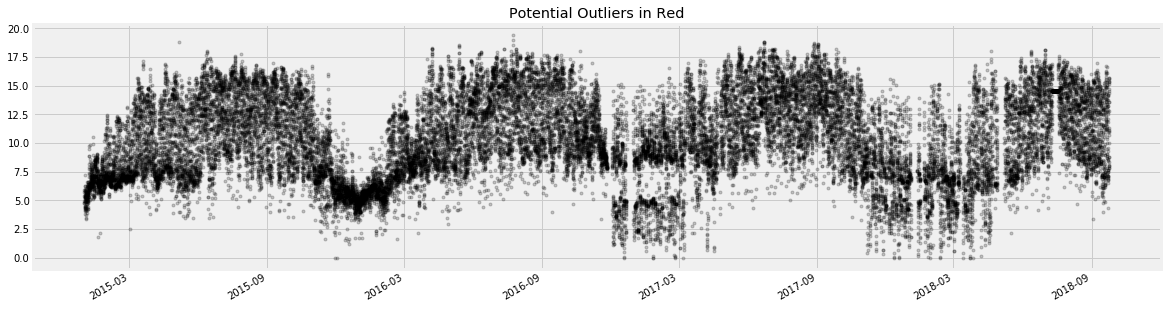

In [633]:
### Identify potential outliers
q25 = delta3.deltat.quantile(0.25)
q75 = delta3.deltat.quantile(0.75)
iqr = q75 - q25
outlier_above = q75 + iqr * 3
outlier_below = q25 - iqr * 1.5
print "Q75 = %.0f" %q75
print "Above threshold = %.0f" %outlier_above
print "Below threshold = %.0f" %outlier_below


delta3.deltat.plot(style=".", figsize=(18,5), c='k', alpha=0.2, title="Potential Outliers in Red")
try:
    delta3.loc[delta3.deltat >= outlier_above,'deltat'].plot(style=".", c='r')
except:
    pass
#delta3.loc[delta3.delta <= outlier_below,'delta'].plot(style=".", c='r')

delta vs CDD = 0.75
delta vs HDD = -0.70
delta vs OAT = 0.84


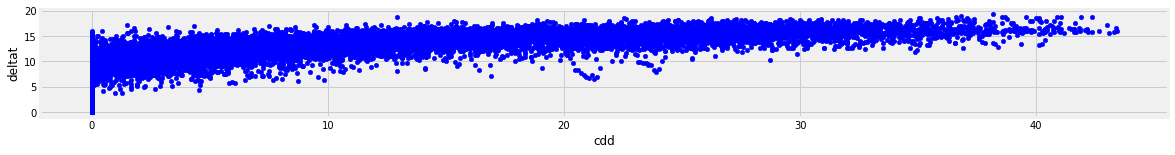

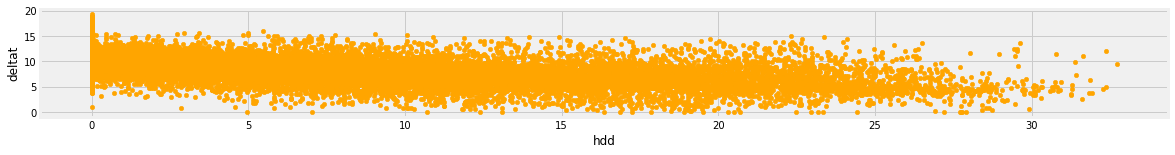

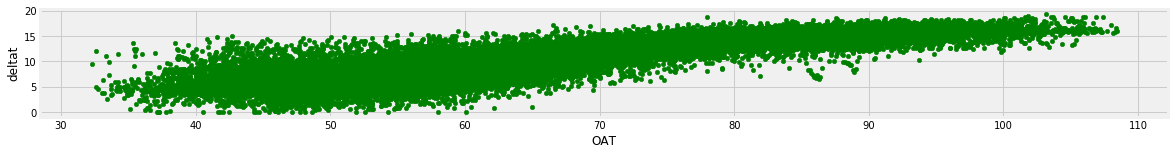

In [28]:
### Remove outliers
delta3 = delta3.loc[delta3.deltat < outlier_above, :]

### Correlation
delta3.plot.scatter(x='cdd', y='deltat',figsize=(18,2), color='blue')
delta3.plot.scatter(x='hdd', y='deltat',figsize=(18,2), color='orange')
delta3.plot.scatter(x='OAT', y='deltat',figsize=(18,2), color='green')
print "delta vs CDD = %.2f" %delta3.deltat.corr(delta3.cdd)
print "delta vs HDD = %.2f" %delta3.deltat.corr(delta3.hdd)
print "delta vs OAT = %.2f" %delta3.deltat.corr(delta3.OAT)

In [502]:
# Add more variables
delta3['rolling7'] = delta3.deltat.rolling(3).mean()

In [634]:
delta3.tail(1)

,OAT,OUTSIDE_AIR_WETBULB_TEMP,OUTSIDE_AIR_HUMIDITY,total tons,deltat,cdd,hdd,cdd2,hdd2,OAT2,...,DOW_4,DOW_5,DOW_6,repump_1,WEEKEND,diff1,diff2,OAT_shift1,OAT_shift2,rolling7
2018-09-24 13:00:00,86.183628,62.115558,18.02394,73277.076174,15.321878,21.183628,0.0,448.746093,0.0,7427.617725,...,0,0,0,0,0,14.390873,13.57042,83.188735,80.367248,14.427724


In [31]:
delta3.columns

Index([u'OAT', u'OUTSIDE_AIR_WETBULB_TEMP', u'OUTSIDE_AIR_HUMIDITY',
       u'total tons', u'deltat', u'cdd', u'hdd', u'cdd2', u'hdd2', u'OAT2',
       u'Date', u'MONTH_2', u'MONTH_3', u'MONTH_4', u'MONTH_5', u'MONTH_6',
       u'MONTH_7', u'MONTH_8', u'MONTH_9', u'MONTH_10', u'MONTH_11',
       u'MONTH_12', u'TOD_1', u'TOD_2', u'TOD_3', u'TOD_4', u'TOD_5', u'TOD_6',
       u'TOD_7', u'TOD_8', u'TOD_9', u'TOD_10', u'TOD_11', u'TOD_12',
       u'TOD_13', u'TOD_14', u'TOD_15', u'TOD_16', u'TOD_17', u'TOD_18',
       u'TOD_19', u'TOD_20', u'TOD_21', u'TOD_22', u'TOD_23', u'DOW_1',
       u'DOW_2', u'DOW_3', u'DOW_4', u'DOW_5', u'DOW_6', u'repump_1',
       u'WEEKEND', u'diff1', u'diff2', u'OAT_shift1', u'OAT_shift2'],
      dtype='object')

In [504]:
x = ['OAT', 'rolling7']
add = ['TOD_1', 'TOD_2',
       'TOD_3', 'TOD_4', 'TOD_5', 'TOD_6', 'TOD_7', 'TOD_8', 'TOD_9',
       'TOD_10', 'TOD_11', 'TOD_12', 'TOD_13', 'TOD_14', 'TOD_15',
       'TOD_16', 'TOD_17', 'TOD_18', 'TOD_19', 'TOD_20', 'TOD_21',
       'TOD_22', 'TOD_23', 'WEEKEND']

y = delta3.deltat
X = delta3[x]

#split with time
index_list = delta3.loc[(delta3.index < "2018-07-01") & (delta3.repump_1 == 1),:].index
delta4 = delta3.drop(delta3.loc[index_list].index)
y2= delta4.deltat

X_train, X_test = delta4.loc["2017-01-01":"2018-08-01",x], delta3.loc["2016-01-01":"2016-11-01",x]
y_train, y_test = y2.loc["2017-01-01":"2018-08-01"], y.loc["2016-01-01":"2016-11-01"]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_sc, X_test_sc = pd.DataFrame(scaler.fit_transform(X_train)), pd.DataFrame(scaler.transform(X_test))
X_train_sc = pd.concat([X_train_sc, delta4.loc["2017-01-01":"2018-08-01",add].reset_index()], axis=1)
X_test_sc = pd.concat([X_test_sc, delta4.loc["2016-01-01":"2016-11-01",add].reset_index()], axis=1)

X_train_sc.rename({0:'diff1',1:'OAT'}, axis=1, inplace=True)

X_train_sc.index= delta4.loc["2017-01-01":"2018-08-01",:].index
X_test_sc.index = delta4.loc["2016-01-01":"2016-11-01",:].index

X_train_sc.drop('index', axis=1, inplace=True)
X_test_sc.drop('index', axis=1, inplace=True)

In [505]:
def adj_r2_score(model,y,yhat):
        """Adjusted R square — put fitted linear model, y value, estimated y value in order
        
            Example:
            In [142]: metrics.r2_score(diabetes_y_train,yhat)
            Out[142]: 0.51222621477934993
        
            In [144]: adj_r2_score(lm,diabetes_y_train,yhat)
            Out[144]: 0.50035823946984515"""
        from sklearn import metrics
        R2 = r2_score(y,yhat)
        n = len(y)
        p = len(model.coef_)
        adj = 1-(1-R2)*(n-1)/(n-p-1)
        return adj

## Modeling

### Linear Regression

In [545]:
### Statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

#X_train1 = sm.add_constant(X_train)
sm = smf.OLS(y_train, X_train_sc)
sm_fit = sm.fit()
#print sm_fit.summary() # 0.986
#print
#print r2_score(y_train,sm_fit.predict(X_train)) # 0.959
sm_rmse_train = math.sqrt(mean_squared_error(y_train, sm_fit.predict(X_train_sc)))
print "CVRMSE = %.2f" %((math.sqrt(sum((y_train-sm_fit.predict(X_train_sc))**2)/(len(y_train)-len(sm_fit.params)))) / y_train.mean())
#print "Train RMSE = ", sm_rmse_train

sm_pred = sm_fit.predict(X_test_sc)
#print "R2 Test Set = ", r2_score(y_test, sm_pred) # 0.966
sm_rmse = math.sqrt(mean_squared_error(y_test, sm_pred))
#print "RMSE = ", sm_rmse
print 

vif = pd.DataFrame()
vif["Features"] = X_train.columns
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
print vif[vif["VIF Factor"] >10]

CVRMSE = 0.07

   Features  VIF Factor
0       OAT   51.449334
1  rolling7   51.449334


Linear Regression Train Adj R2 = 0.90

Linear Regression Test Adj R2 = 0.94

CVRMSE = 0.08

RMSE on Test set = 0.86


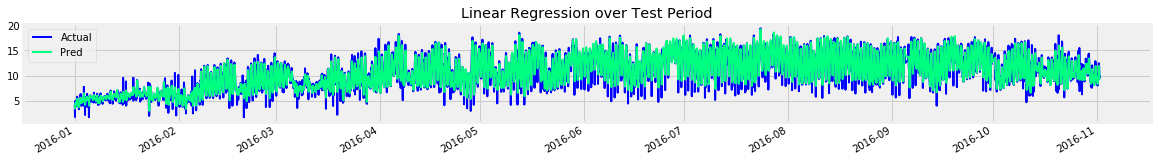

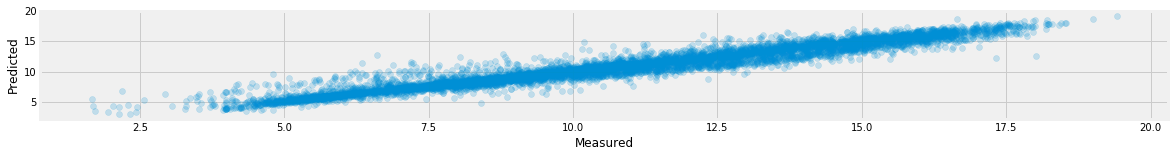

In [546]:
### Scikit Learn
from sklearn import linear_model
lm = linear_model.LinearRegression()
lm_fit = lm.fit(y=y_train,X=X_train)
print "Linear Regression Train Adj R2 = %.2f" %adj_r2_score(lm_fit,y_train,lm.predict(X_train))
print

lm_pred = lm_fit.predict(X_test)
print "Linear Regression Test Adj R2 = %.2f" %adj_r2_score(lm_fit,y_test,lm.predict(X_test))
print
print "CVRMSE = %.2f" %(math.sqrt(mean_squared_error(y_train,lm_fit.predict(X_train)))/ y_train.mean())
lm_rmse = math.sqrt(mean_squared_error(y_test, lm_pred))
print
print "RMSE on Test set = %.2f" %(math.sqrt(mean_squared_error(y_test,lm_fit.predict(X_test))))

#y_test.plot()
#mod_lm_pred.plot()

lm_df = pd.DataFrame({"Actual":y_test,"Pred":lm_pred})
#lm_df = pd.DataFrame({"Actual":y_train,"Pred":lm.predict(X_train)})
lm_df.plot(figsize=(18,2), linewidth=2, colormap='winter', legend=True, title="Linear Regression over Test Period")

fig, ax = plt.subplots(figsize=(18,2))
ax.scatter(lm_df.Actual, lm_df.Pred, alpha=0.2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Tree-Based Methods

### H2O

In [508]:
import h2o
h2o.cluster().shutdown()

In [509]:
import h2o

h2o.init()

from h2o.estimators.gbm import H2OGradientBoostingEstimator
df = h2o.H2OFrame(delta3)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: java version "1.8.0_101"; Java(TM) SE Runtime Environment (build 1.8.0_101-b13); Java HotSpot(TM) 64-Bit Server VM (build 25.101-b13, mixed mode)
  Starting server from /Users/decolvin/anaconda3/envs/py27/h2o_jar/h2o.jar
  Ice root: /var/folders/wt/sqxfmsl95294mklwvqn9x74slb6znt/T/tmpIh0rh3
  JVM stdout: /var/folders/wt/sqxfmsl95294mklwvqn9x74slb6znt/T/tmpIh0rh3/h2o_decolvin_started_from_python.out
  JVM stderr: /var/folders/wt/sqxfmsl95294mklwvqn9x74slb6znt/T/tmpIh0rh3/h2o_decolvin_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321... successful.


H2O cluster uptime:,02 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.18.0.2
H2O cluster version age:,6 months and 20 days !!!
H2O cluster name:,H2O_from_python_decolvin_glbzba
H2O cluster total nodes:,1
H2O cluster free memory:,3.556 Gb
H2O cluster total cores:,4
H2O cluster allowed cores:,4
H2O cluster status:,"accepting new members, healthy"


Parse progress: |█████████████████████████████████████████████████████████| 100%


In [510]:
response = "deltat"
#predictors = df.columns.remove(response)
rm_list = ['Date','diff1','diff2','OAT_shift1','OAT_shift2','deltat']
predictors = [x for x in df.columns if x not in rm_list]

train, valid, test = df.split_frame(
    ratios=[0.8,0.1],
    seed=7,
    destination_frames=['train.hex','valid.hex','test.hex'])

train_h2o = h2o.H2OFrame(delta4["2017-01-01":"2018-08-01"])
test_h2o = h2o.H2OFrame(delta3["2016-01-01":"2016-11-01"])

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [511]:
from h2o.grid.grid_search import H2OGridSearch

# Exhaustive Grid Search
# GBM hyperparameters
gbm_params1 = {'learn_rate': [0.01, 0.1],
               'max_depth': [3, 5, 9]}
               #'sample_rate': [0.8, 1.0],
               #'col_sample_rate': [0.2, 0.5, 1.0]}

# Train and validate a cartesian grid of GBMs
gbm_grid1 = H2OGridSearch(model=H2OGradientBoostingEstimator,
                          grid_id='gbm_grid1',
                          hyper_params=gbm_params1)
gbm_grid1.train(x=predictors, y=response,
                training_frame=train_h2o,
                ntrees=200,
                seed=7,
                validation_frame=test_h2o)#,
               #nfolds=5, fold_assignment = 'AUTO', keep_cross_validation_predictions=True)

# Get the grid results, sorted by validation mse
gbm_gridperf1 = gbm_grid1.get_grid(sort_by='mse', decreasing=False)

# Grab the top GBM model, chosen by validation mse
best_gbm1 = gbm_gridperf1.models[0]

# Now let's evaluate the model performance on a test set
# so we get an honest estimate of top model performance
best_gbm_perf1 = best_gbm1.model_performance(test)
best_gbm_perf1

gbm Grid Build progress: |████████████████████████████████████████████████| 100%

ModelMetricsRegression: gbm
** Reported on test data. **

MSE: 0.661730828035
RMSE: 0.813468393999
MAE: 0.53071604617
RMSLE: 0.100448565558
Mean Residual Deviance: 0.661730828035


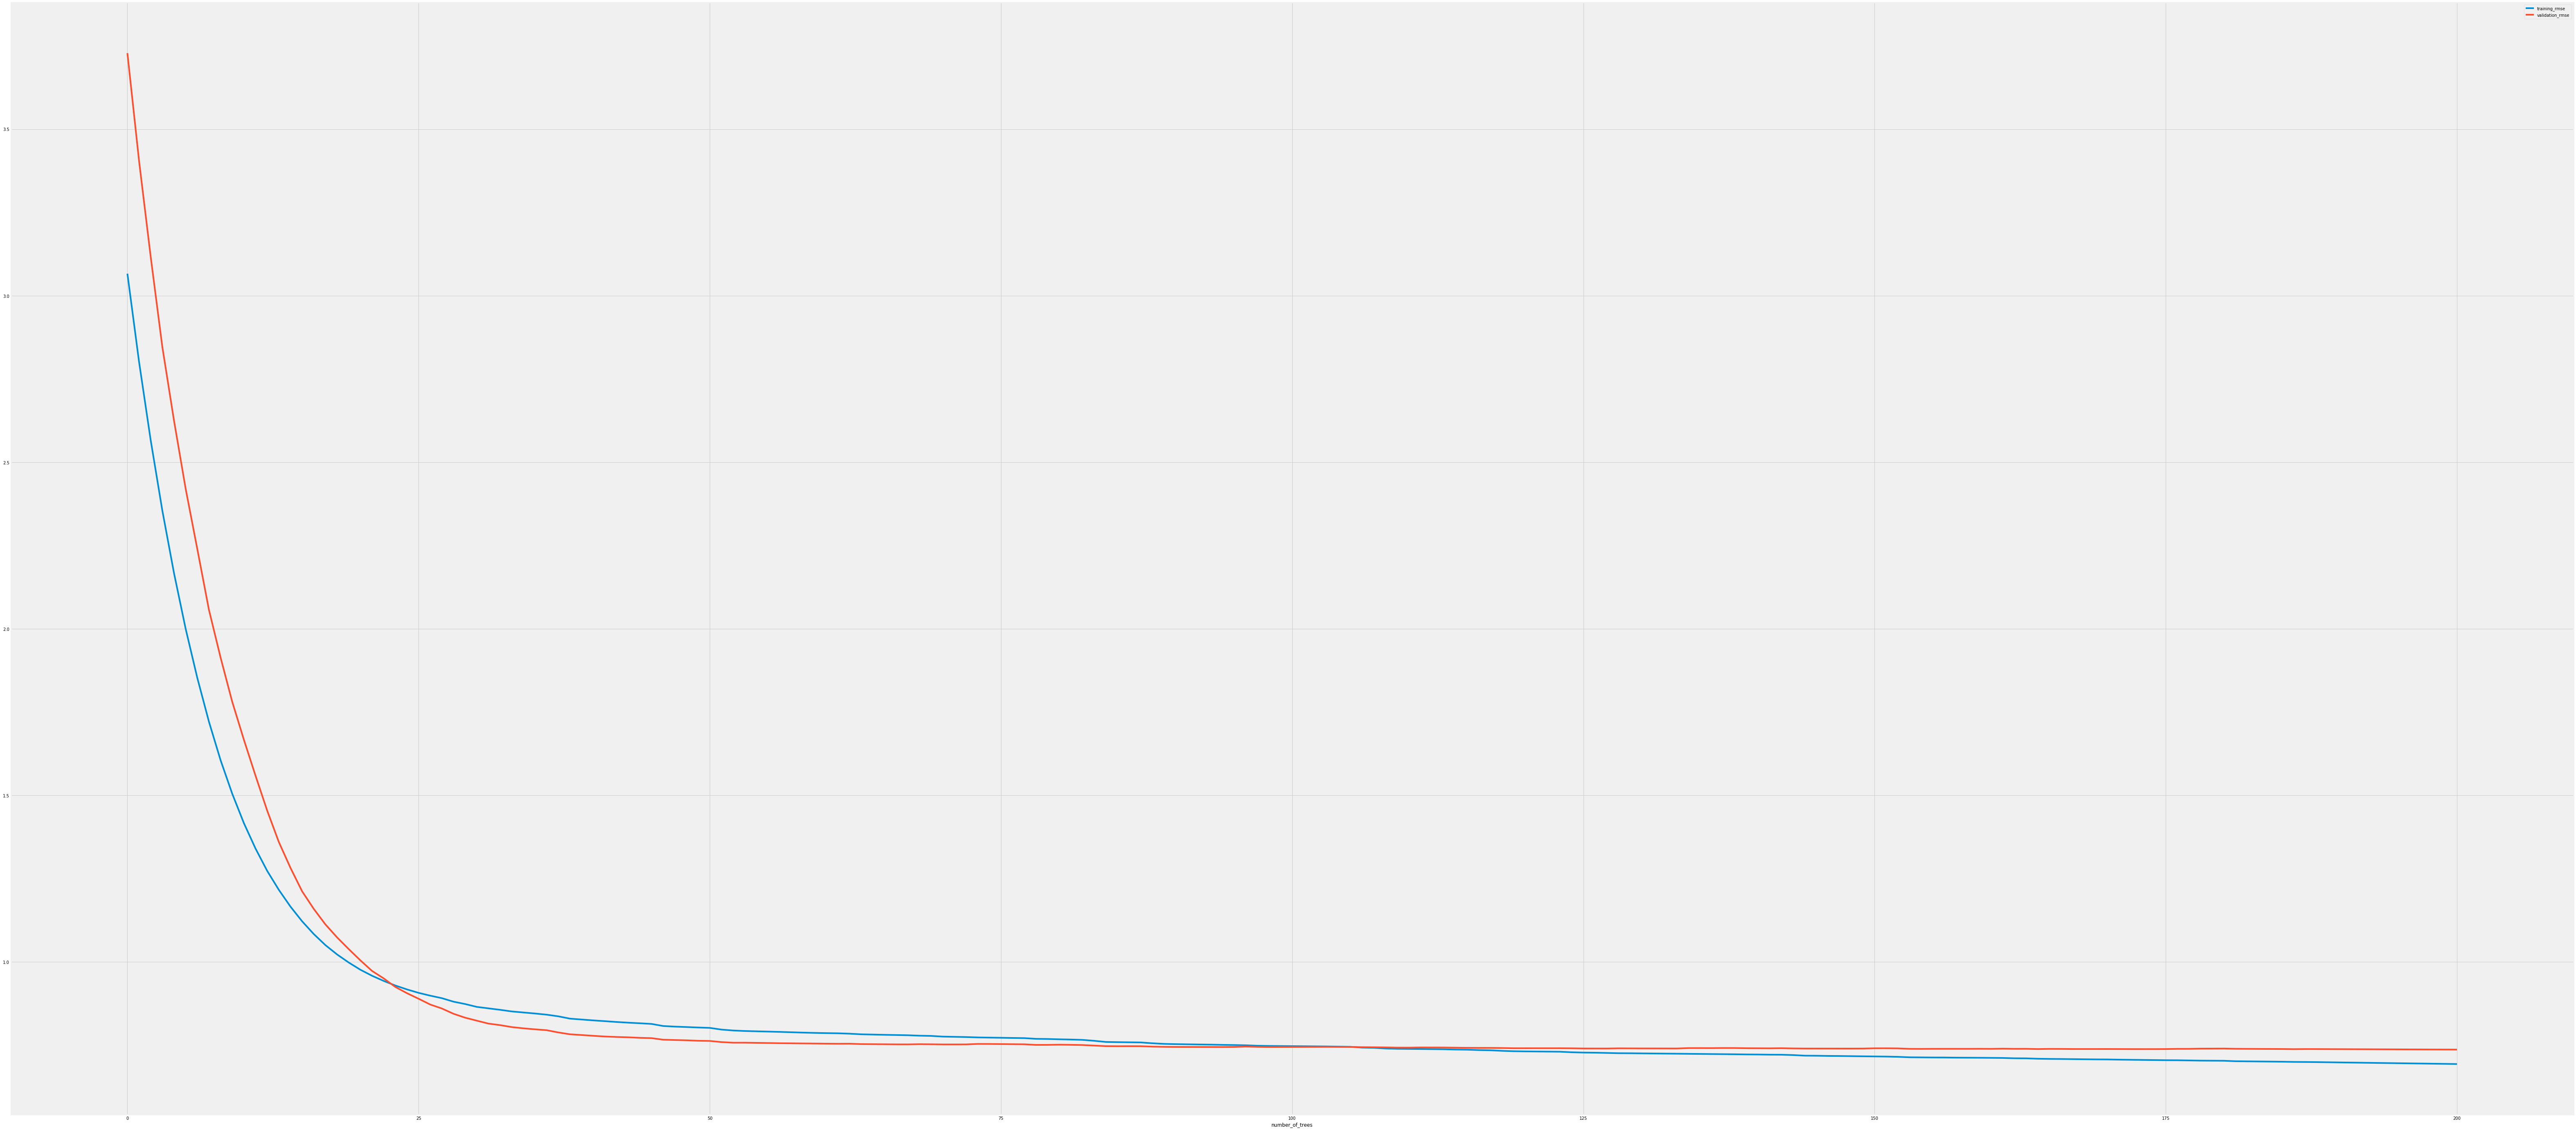

In [512]:
sh = best_gbm1.score_history()
sh = pd.DataFrame(sh)
sh.plot(x='number_of_trees', y = ['training_rmse','validation_rmse'])

Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm prediction progress: |████████████████████████████████████████████████| 100%


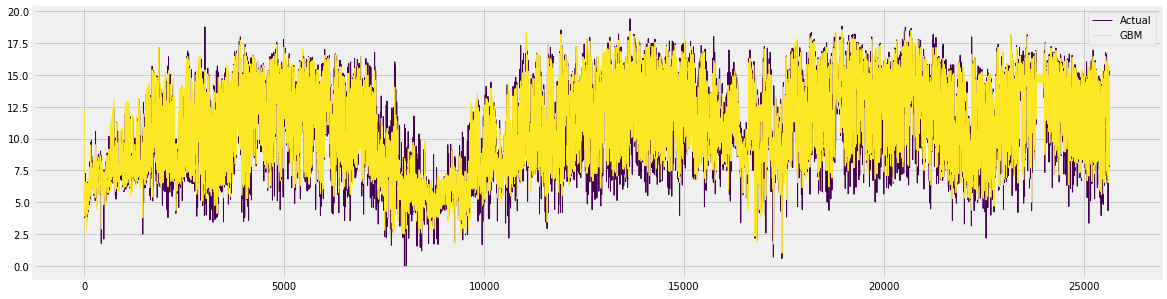

In [513]:
preds = best_gbm1.predict(h2o.H2OFrame(delta4))

com = pd.DataFrame({"Actual":delta4.deltat.values, "GBM":preds.as_data_frame().values.reshape(delta4.deltat.values.shape[0],)})
com.plot(figsize=(18,5), linewidth=1, colormap='viridis')

In [514]:
h2o.cluster().shutdown()

H2O session _sid_ac95 closed.


### LightGBM

In [515]:
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV

estimator = lgb.LGBMRegressor(random_state=7)

param_grid = {'learning_rate': [0.01, 0.1],
               'max_depth': [3, 5, 9],
              'min_child_weight': [1,3,5,7]}

gbm2 = GridSearchCV(estimator, param_grid)

gbm2.fit(delta4.loc["2017-01-01":"2018-01-01",predictors],
                                     delta4.loc["2017-01-01":"2018-01-01",'deltat'])

print("RMSE on Test set = %.3f" %(mean_squared_error(delta3.loc["2016-01-01":"2017-01-01",'deltat'],
                                                     gbm2.best_estimator_.predict(delta3.loc["2016-01-01":"2017-01-01",predictors])) ** 0.5))

RMSE on Test set = 0.806


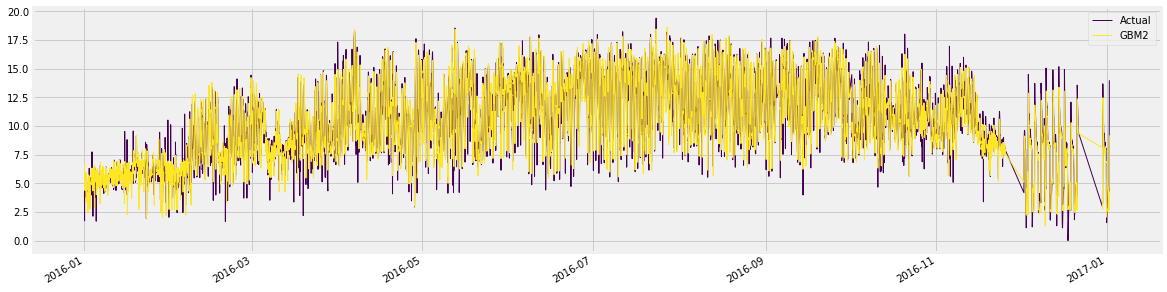

In [516]:
gbm2_df = pd.DataFrame({"Actual":delta3.loc["2016-01-01":"2017-01-01",'deltat'],
                        "GBM2":gbm2.best_estimator_.predict(delta3.loc["2016-01-01":"2017-01-01",predictors])},
                       index=delta3.loc["2016-01-01":"2017-01-01",'deltat'].index)

gbm2_df.plot(figsize=(18,5), linewidth=1, colormap='viridis')

### XGBoost

In [517]:
from xgboost import XGBRegressor

# GBM hyperparameters
xgb_params = {'learning_rate': [0.01, 0.1],
               'max_depth': [3, 5, 9],
              'min_child_weight': [1,3,5,7]}

xgb_mod = XGBRegressor(random_state=7, n_jobs=-1)

gs_xgb = GridSearchCV(xgb_mod,
                      param_grid=xgb_params,
                      cv=5,
                      verbose=2).fit(delta4.loc["2017-01-01":"2018-01-01",predictors],
                                     delta4.loc["2017-01-01":"2018-01-01",'deltat'])

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] learning_rate=0.01, max_depth=3, min_child_weight=1 .............
[CV]  learning_rate=0.01, max_depth=3, min_child_weight=1, total=   1.1s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s


[CV] learning_rate=0.01, max_depth=3, min_child_weight=1 .............
[CV]  learning_rate=0.01, max_depth=3, min_child_weight=1, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_child_weight=1 .............
[CV]  learning_rate=0.01, max_depth=3, min_child_weight=1, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_child_weight=1 .............
[CV]  learning_rate=0.01, max_depth=3, min_child_weight=1, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_child_weight=1 .............
[CV]  learning_rate=0.01, max_depth=3, min_child_weight=1, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_child_weight=3 .............
[CV]  learning_rate=0.01, max_depth=3, min_child_weight=3, total=   1.0s
[CV] learning_rate=0.01, max_depth=3, min_child_weight=3 .............
[CV]  learning_rate=0.01, max_depth=3, min_child_weight=3, total=   0.9s
[CV] learning_rate=0.01, max_depth=3, min_child_weight=3 .............
[CV]  learning_rate=0.01, max_depth=3, min_child_weight=3, total=

[CV]  learning_rate=0.1, max_depth=9, min_child_weight=5, total=   2.3s
[CV] learning_rate=0.1, max_depth=9, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=9, min_child_weight=7, total=   2.3s
[CV] learning_rate=0.1, max_depth=9, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=9, min_child_weight=7, total=   2.3s
[CV] learning_rate=0.1, max_depth=9, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=9, min_child_weight=7, total=   2.3s
[CV] learning_rate=0.1, max_depth=9, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=9, min_child_weight=7, total=   2.3s
[CV] learning_rate=0.1, max_depth=9, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=9, min_child_weight=7, total=   2.3s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  3.0min finished


In [518]:
print(gs_xgb.best_params_)

{'learning_rate': 0.1, 'max_depth': 9, 'min_child_weight': 5}


In [519]:
ypred = gs_xgb.predict(delta3.loc["2016-01-01":"2017-01-01",predictors])
print("RMSE over Test period = %.3f" %(mean_squared_error(delta3.loc["2016-01-01":"2017-01-01",'deltat'], ypred)**0.5))

RMSE over Test period = 0.826


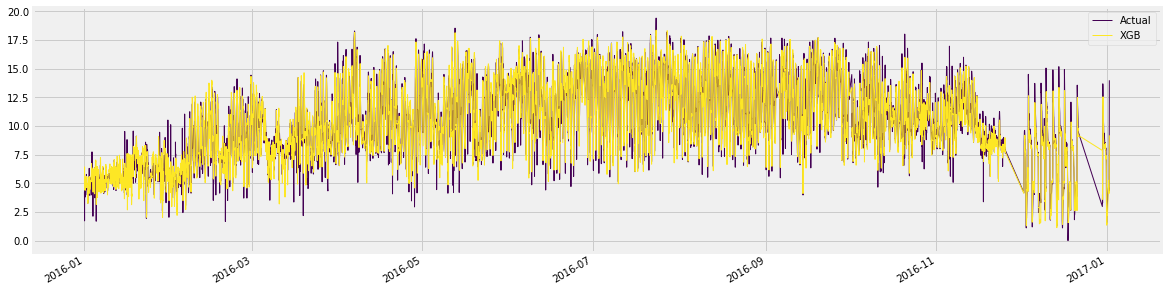

In [520]:
xgb_df = pd.DataFrame({"Actual":delta3.loc["2016-01-01":"2017-01-01",'deltat'],"XGB":ypred},
                      index=delta3["2016-01-01":"2017-01-01"].index)

xgb_df.plot(figsize=(18,5), linewidth=1, colormap='viridis')

### Random Forest, AdaBoost, Gradient Boostig (SciKit Learn)

In [889]:
## Warning: this cell takes ~5 minutes to run

from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

## Scale data
#scaler = StandardScaler()
#X_train_std = scaler.fit_transform(X_train)
#X_test_std = scaler.transform(X_test)

## Grid Search Decision Trees
params_dt = {'max_depth':[1,2,3,4,5,6],'min_samples_split':[2,3,4,5,6]}
dt = DecisionTreeRegressor(random_state=1)
gs_dt = GridSearchCV(dt,param_grid=params_dt).fit(X_train,y_train)
#scores_dt = cross_val_score(gs_dt, X_train, y_train)
#print scores_dt.mean()                             

## Grid Search Random Forest
params_rf = {'max_depth':[1,2,3,4,5,6],'min_samples_split':[2,3,4,5,6],'n_estimators':[1,10,50,100]}
rf = RandomForestRegressor(random_state=1)
gs_rf = GridSearchCV(rf,param_grid=params_rf).fit(X_train,y_train)
#scores_rt = cross_val_score(gs_rf, X_train, y_train)
#print scores_rt.mean()                             

## Grid Search Gradient Boost
params_boost = {'max_depth':[1,2,3,4,5,6],'learning_rate':[0.01,0.1,1,10], 'n_estimators':[1,10,50,100]}                                                  
boost = GradientBoostingRegressor(random_state=1)
gs_boost = GridSearchCV(boost,param_grid=params_boost).fit(X_train,y_train)
#scores_boost = cross_val_score(gs_boost, X_train, y_train)
#print scores_boost.mean()

/Users/decolvin/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/sklearn/model_selection/_search.py:593: RuntimeWarning: overflow encountered in square
  array_means[:, np.newaxis]) ** 2,


Decision Tree R2 = 0.88
Random Forest R2 = 0.90
Gradient Boost R2 = 0.89

Decision Tree Test R2 = 0.89
Random Forest Test R2 = 0.90
Gradient Boost Test R2 = 0.89

Decision Tree RMSE = 1.15
Random Forest RMSE = 1.10
Gradient Boost RMSE = 1.15


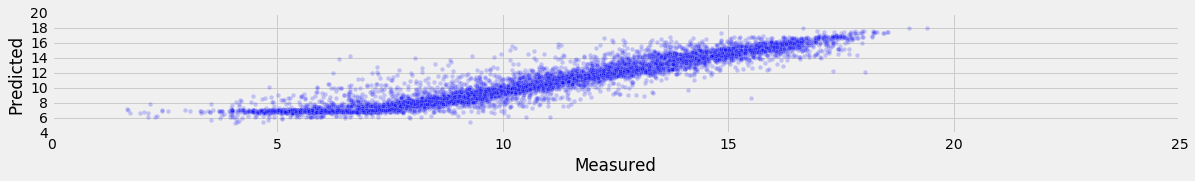

In [890]:
print "Decision Tree R2 = %.2f" %r2_score(y_train, gs_dt.best_estimator_.predict(X_train))
print "Random Forest R2 = %.2f" %r2_score(y_train, gs_rf.best_estimator_.predict(X_train))
#print "Adaboost R2 = %.2f" %r2_score(y_train, gs_adaboost.best_estimator_.predict(X_train))
print "Gradient Boost R2 = %.2f" %r2_score(y_train, gs_boost.best_estimator_.predict(X_train))
print
print "Decision Tree Test R2 = %.2f" %r2_score(y_test, gs_dt.best_estimator_.predict(X_test))
print "Random Forest Test R2 = %.2f" %r2_score(y_test, gs_rf.best_estimator_.predict(X_test))
#print "Adaboost Test R2 = %.2f" %r2_score(y_test, gs_adaboost.best_estimator_.predict(X_test))
print "Gradient Boost Test R2 = %.2f" %r2_score(y_test, gs_boost.best_estimator_.predict(X_test))
print
#print "Decision Tree CVRMSE = %.2f" %((math.sqrt(sum((y_train-gs_dt.predict(X_train))**2)/(len(y_train)-len(lm.coef_)))) / y_train.mean())
#print "Random Forest CVRMSE = %.2f" %((math.sqrt(sum((y_train-gs_rf.predict(X_train))**2)/(len(y_train)-len(lm.coef_)))) / y_train.mean())
#print "Adaboost CVRMSE = %.2f" %((math.sqrt(sum((y_train-gs_adaboost.predict(X_train))**2)/(len(y_train)-len(lm.coef_)))) / y_train.mean())
#print "Gradient Boost CVRMSE = %.2f" %((math.sqrt(sum((y_train-gs_boost.predict(X_train))**2)/(len(y_train)-len(lm.coef_)))) / y_train.mean())

print "Decision Tree RMSE = %.2f" %math.sqrt(mean_squared_error(y_test, gs_dt.best_estimator_.predict(X_test)))
print "Random Forest RMSE = %.2f" %math.sqrt(mean_squared_error(y_test, gs_rf.best_estimator_.predict(X_test)))
#print "Adaboost RMSE = %.2f" %math.sqrt(mean_squared_error(y_test, gs_adaboost.best_estimator_.predict(X_test)))
print "Gradient Boost RMSE = %.2f" %math.sqrt(mean_squared_error(y_test, gs_boost.best_estimator_.predict(X_test)))

# Plot the results
boost_df = pd.DataFrame({"Actual":y_test,"Pred":gs_boost.predict(X_test)})

#boost_df.plot(figsize=(18,2),linewidth=2, colormap='winter', legend=True, title="Gradient Boost over Test Period")

fig, ax = plt.subplots(figsize=(18,2))
ax.scatter(boost_df.Actual, boost_df.Pred, alpha=0.2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

In [891]:
gs_rf.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)

# Recursive Feature Elimination

In [635]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFE, RFECV
from sklearn.cross_validation import StratifiedKFold

np.random.seed(7)
model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=100, n_jobs=1, oob_score=False, random_state=1,
           verbose=0, warm_start=False)
rfe = RFE(model)
rfe_fit = rfe.fit(X_train_sc, y_train)

/Users/decolvin/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Users/decolvin/anaconda3/envs/py27/lib/python2.7/site-packages/sklearn/tree/tree.py:282: DeprecationWarning: The min_impurity_split parameter is deprecated and will be removed in version 0.21. Use the min_impurity_decrease parameter instead.
  DeprecationWarning)


In [48]:
X_train_sc = X_train_sc[X_train_sc.columns[rfe_fit.support_]]
X_train_sc.head()

X_test_sc = X_test_sc[X_test_sc.columns[rfe_fit.support_]]

## Support Vector Regression

In [521]:
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
## Scale data
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

svr = svm.SVR(kernel='rbf', shrinking=False, verbose=2)

#params_svr = {'kernel':['linear','poly','rbf','sigmoid'],'epsilon':[0.01,0.1,1,10], 'C':[1,50,100]}
params_svr = {'epsilon':[0.01,0.1,1,10], 'C':[1,100,500,1000]}
gs_svr = GridSearchCV(svr,param_grid=params_svr).fit(X_train_std,y_train)

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]

SVR(C=1000, cache_size=200, coef0=0.0, degree=3, epsilon=0.01, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=False, tol=0.001, verbose=True)

SVM Train R2 = 0.91
SVM Test R2 = 0.94
SVM RMSE = 0.824


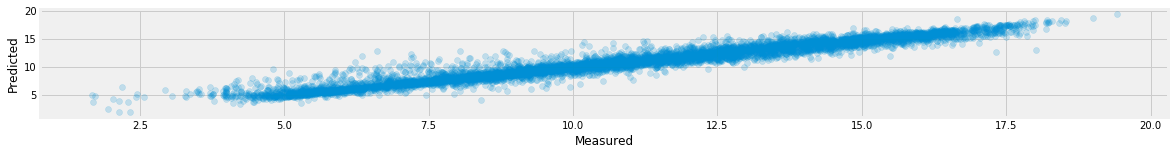

In [522]:
print gs_svr.best_estimator_
print ''

print "SVM Train R2 = %.2f" %r2_score(y_train, gs_svr.best_estimator_.predict(X_train_std))
print "SVM Test R2 = %.2f" %r2_score(y_test, gs_svr.best_estimator_.predict(X_test_std))
print "SVM RMSE = %.3f" %math.sqrt(mean_squared_error(y_test, gs_svr.best_estimator_.predict(X_test_std)))

svr_df = pd.DataFrame({"Actual":y_test,"Pred":gs_svr.best_estimator_.predict(X_test_std)})

fig, ax = plt.subplots(figsize=(18,2))
ax.scatter(svr_df.Actual, svr_df.Pred, alpha=0.2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Artificial Neural Network

In [523]:
x2 = ['OAT', 'TOD_1', 'TOD_2',
       'TOD_3', 'TOD_4', 'TOD_5', 'TOD_6', 'TOD_7', 'TOD_8', 'TOD_9',
       'TOD_10', 'TOD_11', 'TOD_12', 'TOD_13', 'TOD_14', 'TOD_15',
       'TOD_16', 'TOD_17', 'TOD_18', 'TOD_19', 'TOD_20', 'TOD_21',
       'TOD_22', 'TOD_23', 'WEEKEND', 'rolling7']

#X2_train, X2_test = delta3.loc["2017-07-01":"2018-07-01",x2], delta3.loc["2016-01-01":"2017-07-01",x2]
#y_train, y_test = y.loc["2017-07-01":"2018-07-01"], y.loc["2016-01-01":"2017-07-01"]

from sklearn.preprocessing import StandardScaler
## Scale data
scaler = MinMaxScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

In [524]:
from sklearn.neural_network import MLPRegressor
ann = MLPRegressor(random_state=7, max_iter=500, learning_rate='adaptive', early_stopping=True, verbose=True)

params_ann = {'batch_size':[10,20,50],'hidden_layer_sizes':[1,10,100,500,(100,100)],'learning_rate_init':[0.001,0.01,0.1]}
gs_ann = GridSearchCV(ann,param_grid=params_ann,cv=5).fit(X_train_sc,y_train)

Iteration 1, loss = 58.07542644
Validation score: -7.247322
Iteration 2, loss = 20.57746901
Validation score: -0.787996
Iteration 3, loss = 4.17891038
Validation score: 0.493221
Iteration 4, loss = 1.88170399
Validation score: 0.648584
Iteration 5, loss = 1.40464652
Validation score: 0.726235
Iteration 6, loss = 1.13915514
Validation score: 0.769035
Iteration 7, loss = 1.00194742
Validation score: 0.791968
Iteration 8, loss = 0.93070163
Validation score: 0.803901
Iteration 9, loss = 0.88539023
Validation score: 0.813957
Iteration 10, loss = 0.84701375
Validation score: 0.822251
Iteration 11, loss = 0.80949036
Validation score: 0.830083
Iteration 12, loss = 0.77084546
Validation score: 0.839864
Iteration 13, loss = 0.73514270
Validation score: 0.848461
Iteration 14, loss = 0.69974104
Validation score: 0.855167
Iteration 15, loss = 0.66744050
Validation score: 0.862934
Iteration 16, loss = 0.63802829
Validation score: 0.869285
Iteration 17, loss = 0.61126156
Validation score: 0.874654
It

Iteration 51, loss = 0.41547214
Validation score: 0.916959
Iteration 52, loss = 0.41471137
Validation score: 0.916809
Iteration 53, loss = 0.41408996
Validation score: 0.917021
Iteration 54, loss = 0.41389841
Validation score: 0.917280
Iteration 55, loss = 0.41339825
Validation score: 0.916989
Iteration 56, loss = 0.41325121
Validation score: 0.917347
Iteration 57, loss = 0.41262223
Validation score: 0.917086
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 9.60133429
Validation score: 0.797346
Iteration 2, loss = 0.84201027
Validation score: 0.838358
Iteration 3, loss = 0.68334320
Validation score: 0.868548
Iteration 4, loss = 0.56009158
Validation score: 0.894271
Iteration 5, loss = 0.48367516
Validation score: 0.910017
Iteration 6, loss = 0.43575847
Validation score: 0.919303
Iteration 7, loss = 0.40554697
Validation score: 0.916061
Iteration 8, loss = 0.38717320
Validation score: 0.926826
Iteration 9, loss = 0.3758318

Validation score: 0.914730
Iteration 7, loss = 0.41170871
Validation score: 0.921959
Iteration 8, loss = 0.41279204
Validation score: 0.918096
Iteration 9, loss = 0.41067623
Validation score: 0.913578
Iteration 10, loss = 0.40999779
Validation score: 0.916934
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 7.87462686
Validation score: 0.799916
Iteration 2, loss = 0.78227158
Validation score: 0.877388
Iteration 3, loss = 0.50434550
Validation score: 0.912696
Iteration 4, loss = 0.43506340
Validation score: 0.909525
Iteration 5, loss = 0.42471959
Validation score: 0.904754
Iteration 6, loss = 0.42744957
Validation score: 0.909479
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 8.35071304
Validation score: 0.775509
Iteration 2, loss = 0.80188367
Validation score: 0.854728
Iteration 3, loss = 0.54445814
Validation score: 0.898525
Iteration 4, loss = 0.44927292

Iteration 10, loss = 0.39568293
Validation score: 0.901017
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 7.68337755
Validation score: 0.793034
Iteration 2, loss = 0.65914306
Validation score: 0.855112
Iteration 3, loss = 0.49663623
Validation score: 0.876451
Iteration 4, loss = 0.42106713
Validation score: 0.874511
Iteration 5, loss = 0.40514735
Validation score: 0.875183
Iteration 6, loss = 0.40414673
Validation score: 0.884109
Iteration 7, loss = 0.40110695
Validation score: 0.878428
Iteration 8, loss = 0.39783715
Validation score: 0.885653
Iteration 9, loss = 0.40383689
Validation score: 0.880135
Iteration 10, loss = 0.40129967
Validation score: 0.883379
Iteration 11, loss = 0.39578621
Validation score: 0.886137
Iteration 12, loss = 0.39580025
Validation score: 0.883084
Iteration 13, loss = 0.39806620
Validation score: 0.876998
Iteration 14, loss = 0.39125010
Validation score: 0.880223
Validation score did not impro

Validation score: 0.881201
Iteration 6, loss = 0.54516968
Validation score: 0.920718
Iteration 7, loss = 0.52380241
Validation score: 0.909042
Iteration 8, loss = 0.55269578
Validation score: 0.906432
Iteration 9, loss = 0.54187315
Validation score: 0.917593
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.74501396
Validation score: 0.821941
Iteration 2, loss = 0.64562293
Validation score: 0.899014
Iteration 3, loss = 0.61633702
Validation score: 0.880263
Iteration 4, loss = 0.57342022
Validation score: 0.860882
Iteration 5, loss = 0.54142826
Validation score: 0.884575
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.51216093
Validation score: 0.854514
Iteration 2, loss = 0.63985134
Validation score: 0.900550
Iteration 3, loss = 0.62145158
Validation score: 0.880655
Iteration 4, loss = 0.59130778
Validation score: 0.885020
Iteration 5, loss = 0.56374418


Iteration 79, loss = 0.39169809
Validation score: 0.928998
Iteration 80, loss = 0.39093144
Validation score: 0.929293
Iteration 81, loss = 0.39036869
Validation score: 0.929387
Iteration 82, loss = 0.39007690
Validation score: 0.929449
Iteration 83, loss = 0.38996460
Validation score: 0.929282
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 68.59358466
Validation score: -12.658417
Iteration 2, loss = 47.96489805
Validation score: -7.469577
Iteration 3, loss = 26.97667234
Validation score: -3.154472
Iteration 4, loss = 12.19261523
Validation score: -0.687712
Iteration 5, loss = 5.05202607
Validation score: 0.239850
Iteration 6, loss = 2.71711085
Validation score: 0.489402
Iteration 7, loss = 2.04242128
Validation score: 0.576862
Iteration 8, loss = 1.72619597
Validation score: 0.633463
Iteration 9, loss = 1.50579599
Validation score: 0.675631
Iteration 10, loss = 1.34399943
Validation score: 0.706280
Iteration 11, loss = 

Iteration 7, loss = 0.63568813
Validation score: 0.878860
Iteration 8, loss = 0.57881040
Validation score: 0.889446
Iteration 9, loss = 0.53336790
Validation score: 0.896339
Iteration 10, loss = 0.49997562
Validation score: 0.892154
Iteration 11, loss = 0.47663210
Validation score: 0.905484
Iteration 12, loss = 0.45522601
Validation score: 0.910354
Iteration 13, loss = 0.44449600
Validation score: 0.913616
Iteration 14, loss = 0.43497701
Validation score: 0.913810
Iteration 15, loss = 0.42907108
Validation score: 0.915655
Iteration 16, loss = 0.42801416
Validation score: 0.915223
Iteration 17, loss = 0.42601708
Validation score: 0.917171
Iteration 18, loss = 0.42202061
Validation score: 0.915371
Iteration 19, loss = 0.42143742
Validation score: 0.915378
Iteration 20, loss = 0.42285114
Validation score: 0.912789
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 3.20056274
Validation score: 0.867317
Iteration 2, loss = 0.552

Iteration 7, loss = 0.40758023
Validation score: 0.916731
Iteration 8, loss = 0.38877308
Validation score: 0.920794
Iteration 9, loss = 0.37271977
Validation score: 0.916305
Iteration 10, loss = 0.37145426
Validation score: 0.917248
Iteration 11, loss = 0.37270101
Validation score: 0.918372
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 13.85056871
Validation score: 0.753576
Iteration 2, loss = 1.07369739
Validation score: 0.797957
Iteration 3, loss = 0.86816139
Validation score: 0.844065
Iteration 4, loss = 0.66621122
Validation score: 0.883590
Iteration 5, loss = 0.51056754
Validation score: 0.906430
Iteration 6, loss = 0.43909458
Validation score: 0.919024
Iteration 7, loss = 0.40930481
Validation score: 0.921524
Iteration 8, loss = 0.40570720
Validation score: 0.922970
Iteration 9, loss = 0.39747218
Validation score: 0.920085
Iteration 10, loss = 0.39860718
Validation score: 0.915906
Iteration 11, loss = 0.39881589


Iteration 1, loss = 1.73907876
Validation score: 0.891428
Iteration 2, loss = 0.67745827
Validation score: 0.836114
Iteration 3, loss = 0.58160965
Validation score: 0.785863
Iteration 4, loss = 0.58871260
Validation score: 0.903841
Iteration 5, loss = 0.51960458
Validation score: 0.894529
Iteration 6, loss = 0.55705666
Validation score: 0.910193
Iteration 7, loss = 0.50003405
Validation score: 0.901680
Iteration 8, loss = 0.48460720
Validation score: 0.870056
Iteration 9, loss = 0.49362846
Validation score: 0.905317
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.04802713
Validation score: 0.820532
Iteration 2, loss = 0.64140682
Validation score: 0.881237
Iteration 3, loss = 0.63743695
Validation score: 0.807115
Iteration 4, loss = 0.57605981
Validation score: 0.878754
Iteration 5, loss = 0.57482580
Validation score: 0.884872
Iteration 6, loss = 0.53374234
Validation score: 0.890301
Iteration 7, loss = 0.51275022
Valid

Iteration 9, loss = 0.46248213
Validation score: 0.922998
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.42192914
Validation score: 0.892371
Iteration 2, loss = 0.54210578
Validation score: 0.905649
Iteration 3, loss = 0.49868367
Validation score: 0.883480
Iteration 4, loss = 0.51078964
Validation score: 0.914938
Iteration 5, loss = 0.49186886
Validation score: 0.920805
Iteration 6, loss = 0.48649595
Validation score: 0.918075
Iteration 7, loss = 0.47899794
Validation score: 0.915871
Iteration 8, loss = 0.46486320
Validation score: 0.924815
Iteration 9, loss = 0.48576343
Validation score: 0.916799
Iteration 10, loss = 0.45038135
Validation score: 0.924327
Iteration 11, loss = 0.45273538
Validation score: 0.921078
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 2.59306047
Validation score: 0.883939
Iteration 2, loss = 0.54144733
Validation score: 0.88270

Iteration 26, loss = 1.33707057
Validation score: 0.720886
Iteration 27, loss = 1.30322952
Validation score: 0.727423
Iteration 28, loss = 1.27405742
Validation score: 0.733008
Iteration 29, loss = 1.24893252
Validation score: 0.737708
Iteration 30, loss = 1.22713561
Validation score: 0.742034
Iteration 31, loss = 1.20788404
Validation score: 0.745798
Iteration 32, loss = 1.19049016
Validation score: 0.749181
Iteration 33, loss = 1.17467055
Validation score: 0.752464
Iteration 34, loss = 1.15942886
Validation score: 0.755472
Iteration 35, loss = 1.14485468
Validation score: 0.758606
Iteration 36, loss = 1.13094281
Validation score: 0.761557
Iteration 37, loss = 1.11693497
Validation score: 0.764426
Iteration 38, loss = 1.10304231
Validation score: 0.767595
Iteration 39, loss = 1.08905597
Validation score: 0.770700
Iteration 40, loss = 1.07500738
Validation score: 0.773703
Iteration 41, loss = 1.06072149
Validation score: 0.776970
Iteration 42, loss = 1.04612784
Validation score: 0.7799

Iteration 148, loss = 0.39089353
Validation score: 0.929056
Iteration 149, loss = 0.39076283
Validation score: 0.929088
Iteration 150, loss = 0.39033282
Validation score: 0.929021
Iteration 151, loss = 0.39025865
Validation score: 0.929156
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 73.20142450
Validation score: -15.367416
Iteration 2, loss = 66.86481590
Validation score: -13.452935
Iteration 3, loss = 58.11416953
Validation score: -11.340565
Iteration 4, loss = 48.91753469
Validation score: -9.185661
Iteration 5, loss = 39.71806325
Validation score: -7.086984
Iteration 6, loss = 31.02171833
Validation score: -5.166982
Iteration 7, loss = 23.29219297
Validation score: -3.515133
Iteration 8, loss = 16.83186211
Validation score: -2.188481
Iteration 9, loss = 11.78511689
Validation score: -1.194153
Iteration 10, loss = 8.12443412
Validation score: -0.502654
Iteration 11, loss = 5.65570546
Validation score: -0.061046
Ite

Iteration 113, loss = 0.45360921
Validation score: 0.909695
Iteration 114, loss = 0.45146369
Validation score: 0.910121
Iteration 115, loss = 0.44892836
Validation score: 0.910480
Iteration 116, loss = 0.44707005
Validation score: 0.910904
Iteration 117, loss = 0.44510975
Validation score: 0.911383
Iteration 118, loss = 0.44309011
Validation score: 0.911677
Iteration 119, loss = 0.44154405
Validation score: 0.912097
Iteration 120, loss = 0.43966265
Validation score: 0.912403
Iteration 121, loss = 0.43793512
Validation score: 0.912668
Iteration 122, loss = 0.43634127
Validation score: 0.912918
Iteration 123, loss = 0.43540355
Validation score: 0.913267
Iteration 124, loss = 0.43333516
Validation score: 0.913489
Iteration 125, loss = 0.43208809
Validation score: 0.913752
Iteration 126, loss = 0.43105429
Validation score: 0.913749
Iteration 127, loss = 0.42986317
Validation score: 0.914230
Iteration 128, loss = 0.42831190
Validation score: 0.914385
Iteration 129, loss = 0.42727381
Validat

Validation score: 0.928884
Iteration 14, loss = 0.41746822
Validation score: 0.926913
Iteration 15, loss = 0.42514948
Validation score: 0.922164
Iteration 16, loss = 0.42244166
Validation score: 0.920210
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 6.16471068
Validation score: 0.770613
Iteration 2, loss = 0.88117717
Validation score: 0.861596
Iteration 3, loss = 0.62122562
Validation score: 0.888815
Iteration 4, loss = 0.53071742
Validation score: 0.908142
Iteration 5, loss = 0.47543480
Validation score: 0.918867
Iteration 6, loss = 0.45061502
Validation score: 0.923738
Iteration 7, loss = 0.44058728
Validation score: 0.923578
Iteration 8, loss = 0.43042823
Validation score: 0.925707
Iteration 9, loss = 0.43042821
Validation score: 0.924098
Iteration 10, loss = 0.43325231
Validation score: 0.923207
Iteration 11, loss = 0.43413160
Validation score: 0.905155
Validation score did not improve more than tol=0.000100 for tw

Iteration 24, loss = 1.08300498
Validation score: 0.739318
Iteration 25, loss = 1.06221372
Validation score: 0.744496
Iteration 26, loss = 1.03961436
Validation score: 0.750331
Iteration 27, loss = 1.01504162
Validation score: 0.757374
Iteration 28, loss = 0.98722289
Validation score: 0.765228
Iteration 29, loss = 0.95603662
Validation score: 0.773353
Iteration 30, loss = 0.92279620
Validation score: 0.782667
Iteration 31, loss = 0.88769624
Validation score: 0.792411
Iteration 32, loss = 0.85037715
Validation score: 0.802719
Iteration 33, loss = 0.81348105
Validation score: 0.812959
Iteration 34, loss = 0.77659347
Validation score: 0.822768
Iteration 35, loss = 0.74189371
Validation score: 0.831716
Iteration 36, loss = 0.70992225
Validation score: 0.840506
Iteration 37, loss = 0.67945567
Validation score: 0.848338
Iteration 38, loss = 0.65129213
Validation score: 0.855801
Iteration 39, loss = 0.62569831
Validation score: 0.862720
Iteration 40, loss = 0.60205719
Validation score: 0.8688

Validation score: 0.878144
Iteration 4, loss = 0.54632460
Validation score: 0.892588
Iteration 5, loss = 0.48124462
Validation score: 0.904922
Iteration 6, loss = 0.48314811
Validation score: 0.904924
Iteration 7, loss = 0.46057190
Validation score: 0.891798
Iteration 8, loss = 0.45359518
Validation score: 0.913869
Iteration 9, loss = 0.43754729
Validation score: 0.904819
Iteration 10, loss = 0.44763547
Validation score: 0.900466
Iteration 11, loss = 0.44049057
Validation score: 0.903797
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 6.22105884
Validation score: 0.796322
Iteration 2, loss = 0.85157760
Validation score: 0.864266
Iteration 3, loss = 0.63590061
Validation score: 0.894589
Iteration 4, loss = 0.55373360
Validation score: 0.902861
Iteration 5, loss = 0.49244878
Validation score: 0.912136
Iteration 6, loss = 0.49066028
Validation score: 0.916974
Iteration 7, loss = 0.47074287
Validation score: 0.918818
Iterati

Validation score: 0.895380
Iteration 4, loss = 0.55271645
Validation score: 0.884051
Iteration 5, loss = 0.54809256
Validation score: 0.886084
Iteration 6, loss = 0.53631323
Validation score: 0.904918
Iteration 7, loss = 0.52085959
Validation score: 0.906630
Iteration 8, loss = 0.51128958
Validation score: 0.898084
Iteration 9, loss = 0.55394726
Validation score: 0.905367
Iteration 10, loss = 0.57356923
Validation score: 0.887170
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 32.33107633
Validation score: 0.479570
Iteration 2, loss = 1.44821480
Validation score: 0.769949
Iteration 3, loss = 0.93349096
Validation score: 0.807439
Iteration 4, loss = 0.80771991
Validation score: 0.839404
Iteration 5, loss = 0.68421978
Validation score: 0.867018
Iteration 6, loss = 0.57961475
Validation score: 0.885584
Iteration 7, loss = 0.50566709
Validation score: 0.902099
Iteration 8, loss = 0.46293728
Validation score: 0.907727
Iterati

Validation score: 0.883250
Iteration 5, loss = 0.56191738
Validation score: 0.900608
Iteration 6, loss = 0.49276207
Validation score: 0.915556
Iteration 7, loss = 0.44931287
Validation score: 0.921606
Iteration 8, loss = 0.43469498
Validation score: 0.923292
Iteration 9, loss = 0.42370434
Validation score: 0.925799
Iteration 10, loss = 0.42162018
Validation score: 0.927554
Iteration 11, loss = 0.41887159
Validation score: 0.926547
Iteration 12, loss = 0.41451494
Validation score: 0.927313
Iteration 13, loss = 0.41674288
Validation score: 0.926644
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.
Iteration 1, loss = 5.29222059
Validation score: 0.836496
Iteration 2, loss = 0.61128082
Validation score: 0.877872
Iteration 3, loss = 0.49643622
Validation score: 0.891263
Iteration 4, loss = 0.44752923
Validation score: 0.914506
Iteration 5, loss = 0.41769480
Validation score: 0.912978
Iteration 6, loss = 0.40721356
Validation score: 0.908612
Itera

In [525]:
gs_ann.best_estimator_

MLPRegressor(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=500, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

In [526]:
from sklearn.neural_network import MLPRegressor
#ann = MLPRegressor(random_state=1, max_iter=1000)
ann = MLPRegressor(random_state=7, max_iter=500, learning_rate='adaptive', hidden_layer_sizes=100,
                  learning_rate_init=0.001, solver='adam', early_stopping=True)

#ann_mod = ann.fit(X_train_std,y_train)
ann_mod = gs_ann.best_estimator_.fit(X_train_sc, y_train)
ann_mod

Iteration 1, loss = 24.98743477
Validation score: 0.607392
Iteration 2, loss = 1.25381582
Validation score: 0.778272
Iteration 3, loss = 0.94462992
Validation score: 0.819455
Iteration 4, loss = 0.74417485
Validation score: 0.859338
Iteration 5, loss = 0.59143929
Validation score: 0.884030
Iteration 6, loss = 0.50037100
Validation score: 0.896499
Iteration 7, loss = 0.44980245
Validation score: 0.904613
Iteration 8, loss = 0.41821085
Validation score: 0.907356
Iteration 9, loss = 0.39980916
Validation score: 0.909065
Iteration 10, loss = 0.39076594
Validation score: 0.910595
Iteration 11, loss = 0.38537555
Validation score: 0.907303
Iteration 12, loss = 0.38394520
Validation score: 0.908962
Iteration 13, loss = 0.38116401
Validation score: 0.909635
Validation score did not improve more than tol=0.000100 for two consecutive epochs. Stopping.


MLPRegressor(activation='relu', alpha=0.0001, batch_size=50, beta_1=0.9,
       beta_2=0.999, early_stopping=True, epsilon=1e-08,
       hidden_layer_sizes=500, learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=7, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=True,
       warm_start=False)

ANN Train R2 = 0.92
ANN Test R2 = 0.94
ANN RMSE = 0.82
CVRMSE = 0.07


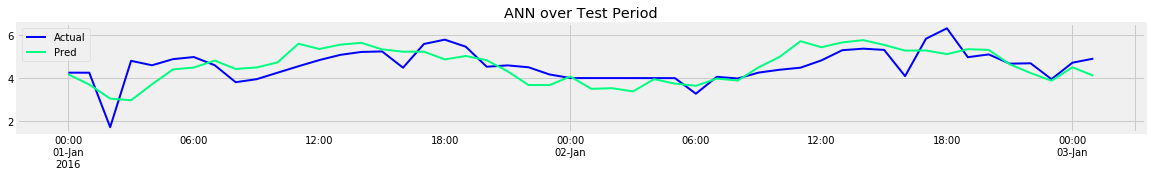

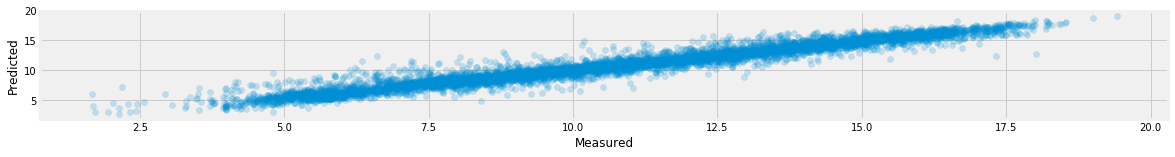

In [527]:
print "ANN Train R2 = %.2f" %r2_score(y_train, ann_mod.predict(X_train_sc))
print "ANN Test R2 = %.2f" %r2_score(y_test, ann_mod.predict(X_test_sc))
print "ANN RMSE = %.2f" %math.sqrt(mean_squared_error(y_test, ann_mod.predict(X_test_sc)))

print "CVRMSE = %.2f" %(math.sqrt(mean_squared_error(y_train,ann_mod.predict(X_train_sc)))/ y_train.mean())

ann_df = pd.DataFrame({"Actual":y_test,"Pred":ann_mod.predict(X_test_sc)})
ann_df[0:50].plot(figsize=(18,2), linewidth=2, colormap='winter', legend=True, title="ANN over Test Period")

fig, ax = plt.subplots(figsize=(18,2))
ax.scatter(ann_df.Actual, ann_df.Pred, alpha=0.2)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

## Compare model RMSE

In [538]:
print "Linear RMSE = %.3f" %lm_rmse
print "XGB RMSE = %.3f" %(math.sqrt(mean_squared_error(delta3.loc["2016-01-01":"2017-01-01",'deltat'],
                                                       gs_xgb.best_estimator_.predict(delta3.loc["2016-01-01":"2017-01-01",predictors]))))
#print "Random Forest RMSE = %.3f" %(math.sqrt(mean_squared_error(y_test, gs_rf.best_estimator_.predict(X_test))))
#print "Boosting RMSE = %.3f" %(math.sqrt(mean_squared_error(y_test, gs_boost.best_estimator_.predict(X_test))))
print "Artificial Neural Network RMSE = %.3f" %(math.sqrt(mean_squared_error(y_test, ann_mod.predict(X_test_sc))))
print "Support Vector Regression RMSE = %.3f" %(math.sqrt(mean_squared_error(y_test, gs_svr.best_estimator_.predict(X_test_std))))

Linear RMSE = 0.796
XGB RMSE = 0.806
Artificial Neural Network RMSE = 0.818
Support Vector Regression RMSE = 0.824


# Keras NN (bonus)

In [640]:
from keras.models import Sequential
from keras.optimizers import *
from keras.layers import *
import keras.backend as K
from keras.layers import LSTM
from keras.layers import Embedding
from keras.callbacks import EarlyStopping
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasRegressor
np.random.seed(7)

callbacks_list = [EarlyStopping(monitor='val_loss', patience=5, min_delta=0.001, verbose=2)]

ImportError: cannot import name np_utils

#### Set training and test sets

In [51]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))

#x = ['OAT','TOD_1', 'TOD_2',
#       'TOD_3', 'TOD_4', 'TOD_5', 'TOD_6', 'TOD_7', 'TOD_8', 'TOD_9',
#       'TOD_10', 'TOD_11', 'TOD_12', 'TOD_13', 'TOD_14', 'TOD_15',
#       'TOD_16', 'TOD_17', 'TOD_18', 'TOD_19', 'TOD_20', 'TOD_21',
#       'TOD_22', 'TOD_23', 'WEEKEND', 'rolling7']

x = ['OAT', 'rolling7']

X_train, X_test = delta4.loc["2017-07-01":"2018-07-01",delta4.columns == 'deltat'], delta4.loc["2016-01-01":"2016-11-01",delta4.columns == 'deltat']
X_train, X_test = delta4.loc["2017-07-01":"2018-07-01",x], delta4.loc["2016-01-01":"2016-11-01",x]

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

y_train_sc = delta4.loc["2017-07-01":"2018-07-01",'deltat']
y_test_sc = delta4.loc["2016-01-01":"2016-11-01",'deltat']

X_train_sc = X_train_sc
y_train_sc = y_train_sc

X_test_sc = X_test_sc
y_test_sc = y_test_sc

In [52]:
print('Train size: (%d x %d)'%(X_train_sc.shape[0], X_train_sc.shape[1]))
print('Test size: (%d x %d)'%(X_test_sc.shape[0], X_test_sc.shape[1]))

Train size: (4463 x 2)
Test size: (7293 x 2)


### Define models

In [59]:
# Function to create model, required for KerasRegressor
def create_model1():
    # create model
    model = Sequential()
    model.add(Dense(20, input_shape=(X_train_sc.shape[1],), activation='relu', kernel_initializer='lecun_uniform'))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
    return model

In [56]:
# Reshape to 3D for LSTM
X_train_sc_3d = np.reshape(X_train_sc, (X_train_sc.shape[0], 1, X_train_sc.shape[1]))
X_test_sc_3d = np.reshape(X_test_sc, (X_test_sc.shape[0], 1, X_test_sc.shape[1]))
print X_train_sc_3d.shape

(4463, 1, 2)


In [66]:
# Function to create model, required for KerasRegressor
def create_model2():
    # create model
    model = Sequential()
    model.add(LSTM(100,input_shape=(X_test_sc_3d.shape[1], X_test_sc_3d.shape[2]), return_sequences=True))
    #model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dense(1))
    # Compile model
    model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
    return model
""" Here we are creating a model with 2 layers, both of LSTM type with 100 nodes each """

' Here we are creating a model with 2 layers, both of LSTM type with 100 nodes each '

#### Set model as 'model'

In [60]:
# create model

model1 = KerasRegressor(build_fn=create_model1, verbose=2, batch_size=16)

model2 = KerasRegressor(build_fn=create_model2, verbose=2, batch_size=16)

### Grid search (time intensive search)

#### Model 1

In [63]:
K.clear_session()
np.random.seed(7)

# define the grid search parameters
batch_size = [16, 32]
epochs = [50, 100]
#neurons = [1, 5, 10]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model1, param_grid=param_grid, cv=3)

keras_grid = grid.fit(X_train_sc, y_train_sc)

Epoch 1/50
 - 0s - loss: 127.7671
Epoch 2/50
 - 0s - loss: 66.6206
Epoch 3/50
 - 0s - loss: 18.2532
Epoch 4/50
 - 0s - loss: 3.7748
Epoch 5/50
 - 0s - loss: 2.2524
Epoch 6/50
 - 0s - loss: 2.1483
Epoch 7/50
 - 0s - loss: 2.0813
Epoch 8/50
 - 0s - loss: 2.0118
Epoch 9/50
 - 0s - loss: 1.9391
Epoch 10/50
 - 0s - loss: 1.8638
Epoch 11/50
 - 0s - loss: 1.7018
Epoch 12/50
 - 0s - loss: 1.5559
Epoch 13/50
 - 0s - loss: 1.4494
Epoch 14/50
 - 0s - loss: 1.3719
Epoch 15/50
 - 0s - loss: 1.3189
Epoch 16/50
 - 0s - loss: 1.2798
Epoch 17/50
 - 0s - loss: 1.2543
Epoch 18/50
 - 0s - loss: 1.2347
Epoch 19/50


KeyboardInterrupt: 

#### Model 2

In [65]:
K.clear_session()
np.random.seed(7)

# define the grid search parameters
batch_size = [16, 32]
epochs = [50, 100]
#neurons = [1, 5, 10]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model2, param_grid=param_grid, cv=3)

keras_grid2 = grid.fit(X_train_sc_3d, y_train_sc)

ValueError: Error when checking input: expected lstm_1_input to have shape (49, 2) but got array with shape (1, 2)

#### Summarize best model and fit it to 'history'

In [816]:
# summarize results - model1
print("Best: %f using %s" % (keras_grid.best_score_, keras_grid.best_params_))
means = keras_grid.cv_results_['mean_test_score']
stds = keras_grid.cv_results_['std_test_score']
params = keras_grid.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

print("")

# summarize results - model2
print("Best: %f using %s" % (keras_grid2.best_score_, keras_grid2.best_params_))
means = keras_grid2.cv_results_['mean_test_score']
stds = keras_grid2.cv_results_['std_test_score']
params = keras_grid2.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: -1.339043 using {'epochs': 100, 'batch_size': 16}
-1.375690 (0.172971) with: {'epochs': 50, 'batch_size': 16}
-1.339043 (0.160035) with: {'epochs': 100, 'batch_size': 16}
-1.388702 (0.181662) with: {'epochs': 50, 'batch_size': 32}
-1.390569 (0.165962) with: {'epochs': 100, 'batch_size': 32}

Best: -1.297745 using {'epochs': 50, 'batch_size': 32}
-1.298401 (0.174621) with: {'epochs': 50, 'batch_size': 16}
-1.373385 (0.113368) with: {'epochs': 100, 'batch_size': 16}
-1.297745 (0.185570) with: {'epochs': 50, 'batch_size': 32}
-1.321694 (0.095759) with: {'epochs': 100, 'batch_size': 32}


In [809]:
# Fit the model
#callbacks_list = [EarlyStopping(monitor='val_loss', patience=3, min_delta=0.001, verbose=0)]
#np.random.seed(7)

history = keras_grid.best_estimator_.fit(X_train_sc, y_train_sc, verbose=0)

history2 = keras_grid2.best_estimator_.fit(X_train_sc_3d, y_train_sc, verbose=0)

print('R-Squared Train: %f' %(r2_score(y_train_sc, history.model.predict(X_train_sc))))
print('R-Squared Test: %f' %(r2_score(y_test_sc, history.model.predict(X_test_sc))))
print("Keras RMSE = %.3f" %(math.sqrt(mean_squared_error(y_test_sc, history.model.predict(X_test_sc)))))

print 

print('R-Squared Train: %f' %(r2_score(y_train_sc, history2.model.predict(X_train_sc_3d))))
print('R-Squared Test: %f' %(r2_score(y_test_sc, history2.model.predict(X_test_sc_3d))))
print("Keras RMSE = %.3f" %(math.sqrt(mean_squared_error(y_test_sc, history2.model.predict(X_test_sc_3d)))))

Epoch 1/100
 - 3s - loss: 103.7906
Epoch 2/100
 - 0s - loss: 13.3704
Epoch 3/100
 - 0s - loss: 3.4835
Epoch 4/100
 - 0s - loss: 2.2232
Epoch 5/100
 - 0s - loss: 1.8294
Epoch 6/100
 - 0s - loss: 1.7212
Epoch 7/100
 - 0s - loss: 1.6443
Epoch 8/100
 - 0s - loss: 1.5722
Epoch 9/100
 - 0s - loss: 1.5001
Epoch 10/100
 - 0s - loss: 1.4360
Epoch 11/100
 - 0s - loss: 1.3916
Epoch 12/100
 - 0s - loss: 1.3601
Epoch 13/100
 - 0s - loss: 1.3360
Epoch 14/100
 - 0s - loss: 1.3124
Epoch 15/100
 - 0s - loss: 1.2971
Epoch 16/100
 - 0s - loss: 1.2895
Epoch 17/100
 - 0s - loss: 1.2819
Epoch 18/100
 - 0s - loss: 1.2732
Epoch 19/100
 - 0s - loss: 1.2748
Epoch 20/100
 - 0s - loss: 1.2639
Epoch 21/100
 - 0s - loss: 1.2651
Epoch 22/100
 - 0s - loss: 1.2563
Epoch 23/100
 - 0s - loss: 1.2552
Epoch 24/100
 - 0s - loss: 1.2544
Epoch 25/100
 - 0s - loss: 1.2509
Epoch 26/100
 - 1s - loss: 1.2491
Epoch 27/100
 - 0s - loss: 1.2480
Epoch 28/100
 - 0s - loss: 1.2441
Epoch 29/100
 - 0s - loss: 1.2462
Epoch 30/100
 - 0s -

TypeError: Expected sequence or array-like, got <class 'keras.callbacks.History'>

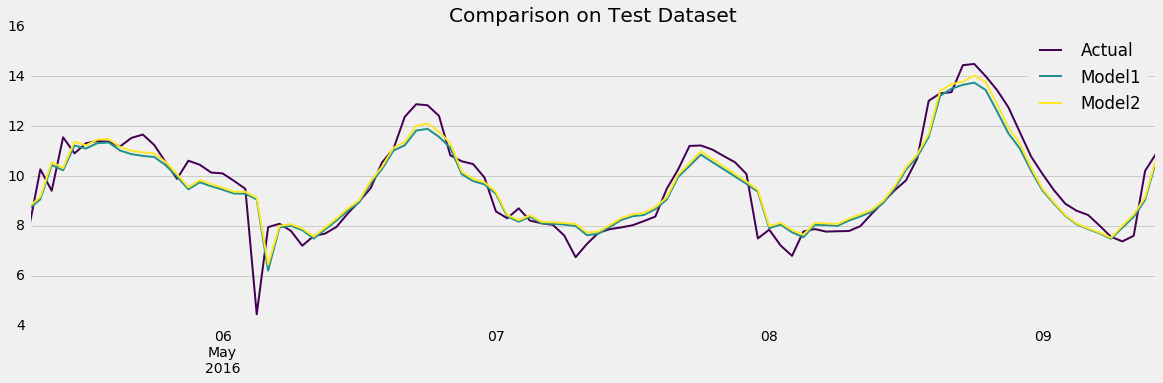

In [759]:
comp = pd.DataFrame({"Actual":y_test_sc,
                     "Model1":np.reshape(history.model.predict(X_test_sc),history.model.predict(X_test_sc).shape[0]),
                     "Model2":np.reshape(history2.model.predict(X_test_sc_3d),history2.model.predict(X_test_sc_3d).shape[0])})

comp.iloc[3000:3100,:].plot(figsize=(18,5), legend=True, colormap='viridis', linewidth=2, title="Comparison on Test Dataset")

#plt.figure(figsize=(18,5))
#plt.plot(y_test_sc, linewidth=1)
#plt.plot(history.model.predict(X_test_sc), linewidth=1)
#plt.plot(history2.model.predict(X_test_sc_3d), linewidth=1)
#plt.title("Comparison on Test Dataset")
#plt.legend(["Actual","Model1","Model2"])
#plt.show()